In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from scipy.signal.windows import gaussian
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

In [2]:
fs, data = wavfile.read('2015-02-04T03-27-32_053000.wav')
print(data)


[-2353150 -9135665 -3159691 ... -1830970 -4044564 -9027695]


In [11]:
def plot_spectrogram_from_wav(
    audio_path, 
    duration_minutes=1, 
    nfft=2048, 
    winsize=256, 
    overlap=108, 
    cmap='magma', 
    num_y_ticks=20,
    use_log_scale=False
):
    """
    Loads a WAV file, trims it to the specified duration, computes the spectrogram,
    and plots the spectrogram without dB conversion.

    Parameters:
      audio_path (str): Path to the WAV file.
      duration_minutes (float): Duration (in minutes) to trim the audio (default is 1 minute).
      nfft (int): Length of the FFT (default is 512).
      winsize (int): Window size (number of samples per segment; default is 256).
      overlap (int): Number of overlapping samples between segments (default is 98).
      cmap (str): Colormap used for the plot (default is 'magma').
      num_y_ticks (int): Number of y-axis ticks (default is 20).
      use_log_scale (bool): If True, display the frequency axis in logarithmic scale (default is False).
    """
    # -------------------------------
    # 1. Load the WAV File
    # -------------------------------
    fs, data = wavfile.read(audio_path)
    
    # If the file is stereo or multi-channel, use only the first channel.
    if data.ndim > 1:
        data = data[:, 0]
    
    # Convert data to float32 for processing.
    data = data.astype(np.float32)
    
    # -------------------------------
    # 2. Trim the Audio to the Specified Duration
    # -------------------------------
    # Compute the number of samples corresponding to the specified duration in minutes.
    duration_samples = int(fs * duration_minutes * 60)
    data_trimmed = data[:duration_samples]
    
    # -------------------------------
    # 3. Compute the Spectrogram
    # -------------------------------
    # Use spectrogram with the provided parameters.
    f, t, Sxx = spectrogram(data_trimmed, fs=fs, nperseg=winsize, noverlap=overlap, nfft=nfft)
    
    # -------------------------------
    # 4. Plot the Spectrogram (Without dB Conversion)
    # -------------------------------
    plt.figure()
    plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap=cmap)
    plt.colorbar(label='Power')
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')
    plt.title(f'Spectrogram')
    
    # Set the y-axis limits to avoid the zero frequency.
    plt.ylim([f[1], f[-1]])
    
    # Use logarithmic y-scale if requested.
    if use_log_scale:
        plt.yscale('log')
    
    # Add more y-axis ticks.
    y_ticks = np.linspace(f[1], f[-1], num=num_y_ticks)
    plt.yticks(y_ticks, labels=np.around(y_ticks, decimals=0))
    
    plt.tight_layout()
    plt.show()

In [9]:
plot_spectrogram_from_wav('2014-03-26T12-00-30_647000.wav', duration_minutes=2)

FileNotFoundError: [Errno 2] No such file or directory: '2014-03-26T12-00-30_647000.wav'

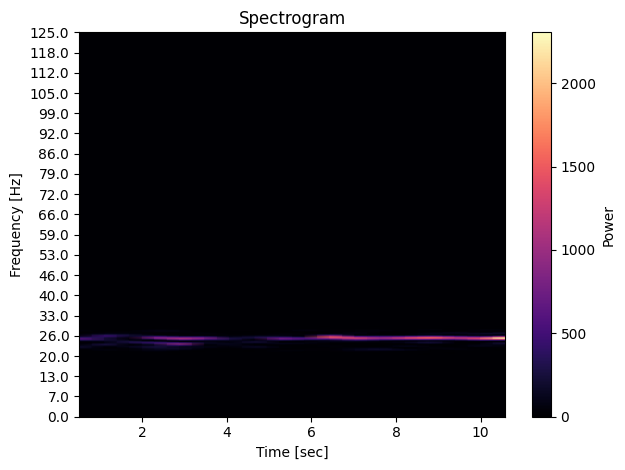

In [12]:
plot_spectrogram_from_wav('train\\ballenyislands2015\\bma\\2015-02-04T03-27-32_053000_21.9-28.4Hz.wav', duration_minutes=1)

C:\Users\u5\AppData\Local\Temp\ipykernel_8356\3192796038.py:28: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(audio_path)


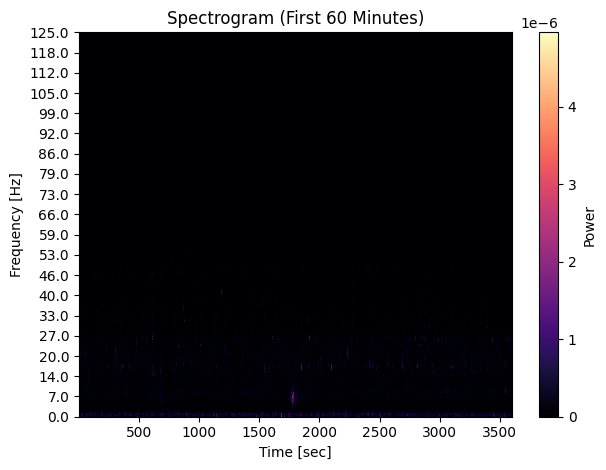

In [6]:
plot_spectrogram_from_wav('2015-02-04T03-00-00_000.wav', duration_minutes=60)

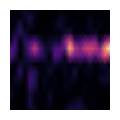

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

def plot_spectrogram_100px(
    audio_path,
    low_freq: float = None,
    high_freq: float = None,
    nfft: int = 512,
    nperseg: int = 256,
    noverlap: int = 128,
    cmap: str = 'magma'
):
    """
    Load a trimmed WAV, compute its spectrogram, crop in frequency,
    and display a 100×100 px border‑free image.
    """
    # 1) Load & mono
    sr, data = wavfile.read(audio_path)
    if data.ndim > 1:
        data = data.mean(axis=1)
    data = data.astype(np.float32)

    # 2) Compute spectrogram
    f, t, Sxx = spectrogram(
        data, fs=sr,
        nperseg=nperseg,
        noverlap=noverlap,
        nfft=nfft,
        scaling='density'
    )

    # 3) Crop freq
    f_min = f[1] if low_freq is None else low_freq
    f_max = f[-1] if high_freq is None else high_freq
    mask = (f >= f_min) & (f <= f_max)
    f_crop   = f[mask]
    Sxx_crop = Sxx[mask, :]

    # 4) Plot into a 100×100 px figure, no border/axes
    fig = plt.figure(figsize=(1, 1), dpi=100, frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.pcolormesh(t, f_crop, Sxx_crop, shading='gouraud', cmap=cmap)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

# Example usage:
if __name__ == "__main__":
    wav_file = 'train_1/ballenyislands2015/bma/2015-02-04T03-27-32_053000.wav'
    plot_spectrogram_100px(
        audio_path=wav_file,
        low_freq=21.9,
        high_freq=28.4,
        nfft=512,
        nperseg=256,
        noverlap=128,
        cmap='magma'
    )


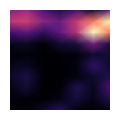

In [8]:
if __name__ == '__main__':
    # Path to one of your trimmed files
    wav_file = 'train_1/ballenyislands2015/bma/2015-02-16T11-52-24_753000.wav'
    # The freq bounds for that file (from your CSV):
    low_frequency  = 22.4
    high_frequency = 27.3

    plot_spectrogram_100px(
        audio_path=wav_file,
        low_freq=low_frequency,
        high_freq=high_frequency,
        nfft=512,
        nperseg=256,
        noverlap=128,
        cmap='magma'
    )


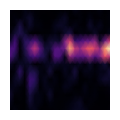

In [9]:
if __name__ == '__main__':
    # Path to one of your trimmed files
    wav_file = '2015-02-04T03-27-32_053000_21.9-28.4Hz.wav'
    # The freq bounds for that file (from your CSV):
    low_frequency  = 21.9
    high_frequency = 28.4

    plot_spectrogram_100px(
        audio_path=wav_file,
        low_freq=low_frequency,
        high_freq=high_frequency,
        nfft=512,
        nperseg=256,
        noverlap=128,
        cmap='magma'
    )

C:\Users\u5\AppData\Local\Temp\ipykernel_21380\116775394.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = mpl_cm.get_cmap(cmap)


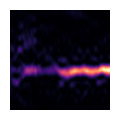

Saved colored 100×100 spectrogram to 2014-03-26T12-00-07_917000.wav_spec100x100.png


In [15]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
from PIL import Image

def make_and_save_sharp_100px_spectrogram(
    wav_path: str,
    low_f: float,
    high_f: float,
    output_path: str,
    nperseg: int = 512,
    noverlap: int = 508,
    nfft: int = 2048,
    cmap: str = 'magma'
):
    """
    Load a trimmed WAV, compute a high-res spectrogram, crop frequencies,
    apply colormap, downsample to 100×100 px with Lanczos, display it, and save to output_path.
    """
    # 1) Read & mono-convert
    sr, data = wavfile.read(wav_path)
    if data.ndim > 1:
        data = data.mean(axis=1)
    data = data.astype(np.float32)

    nperseg = min(nperseg, data.shape[0])
# make sure overlap is strictly less than the segment length
    noverlap = min(noverlap, nperseg - 1)

    # 2) Compute high‑resolution spectrogram
    f, t, Sxx = spectrogram(
        data,
        fs=sr,
        nperseg=nperseg,
        noverlap=noverlap,
        nfft=nfft,
        scaling='density'
    )

    # 3) Crop frequency band
    mask = (f >= low_f) & (f <= high_f)
    Sxx_crop = Sxx[mask, :]

    # 4) Normalize to [0,1]
    Sxx_norm = (Sxx_crop - Sxx_crop.min()) / (Sxx_crop.max() - Sxx_crop.min())

    # 5) Apply colormap to get an RGB image
    colormap = mpl_cm.get_cmap(cmap)
    rgba_img = colormap(Sxx_norm)            # shape: (H, W, 4)
    rgb_img = (rgba_img[..., :3] * 255).astype(np.uint8)

    # 6) Create PIL image and resize to 100×100 using LANCZOS
    pil_img = Image.fromarray(rgb_img)
    small = pil_img.resize((100, 100), resample=Image.LANCZOS)

    # 7) (Optional) display in matplotlib
    plt.figure(figsize=(1, 1), dpi=100)
    plt.imshow(small)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

    # 8) Save to disk as a true RGB PNG
    small.save(output_path)
    print(f"Saved colored 100×100 spectrogram to {output_path}")


# --- Example usage ---
if __name__ == "__main__":
    wav_file = 'train\\ballenyislands2015\\bma\\2015-02-04T03-27-32_053000_21.9-28.4Hz.wav'
    out_png  = '2014-03-26T12-00-07_917000.wav_spec100x100.png'
    make_and_save_sharp_100px_spectrogram(
        wav_path=wav_file,
        low_f=21.9,
        high_f=28.4,
        output_path=out_png
    )


In [4]:
import os
import re
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram
import pywt
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score, confusion_matrix
import matplotlib.pyplot as plt

# --- Helper functions ---

def pad_signal(data: np.ndarray, target_len: int) -> np.ndarray:
    """
    Zero-pad or truncate a 1D numpy array to exactly target_len samples.
    """
    if data.shape[0] < target_len:
        return np.pad(data, (0, target_len - data.shape[0]), mode='constant')
    return data[:target_len]


def compute_cropped_padded_sxx(
    data: np.ndarray,
    fs: int,
    nperseg: int,
    noverlap: int,
    nfft: int,
    low_f: float,
    high_f: float,
    target_cols: int
) -> np.ndarray:
    """
    Compute spectrogram, crop to [low_f, high_f], then pad/truncate
    time-axis to target_cols columns. Returns Sxx_crop of shape (freq_bins, target_cols).
    """
    # full spectrogram
    f, t, Sxx = spectrogram(
        data,
        fs=fs,
        nperseg=nperseg,
        noverlap=noverlap,
        nfft=nfft,
        scaling='density'
    )
    # crop frequency band
    freq_mask = (f >= low_f) & (f <= high_f)
    Sxx_crop = Sxx[freq_mask, :]
    # pad or trim time axis
    n_cols = Sxx_crop.shape[1]
    if n_cols < target_cols:
        pad_w = target_cols - n_cols
        Sxx_crop = np.pad(Sxx_crop, ((0, 0), (0, pad_w)), mode='constant', constant_values=0)
    else:
        Sxx_crop = Sxx_crop[:, :target_cols]
    return Sxx_crop


def extract_wavelet_stats_2d(Sxx: np.ndarray, wavelet: str = 'db15', level: int = 5) -> np.ndarray:
    """
    Perform a 2D wavelet decomposition and summarize each subband by mean and std.
    """
    coeffs = pywt.wavedec2(Sxx, wavelet=wavelet, level=level)
    feats = []
    # approximation
    cA = coeffs[0]
    feats.extend([np.mean(cA), np.std(cA)])
    # detail subbands for each level
    for (cH, cV, cD) in coeffs[1:]:
        feats.extend([np.mean(cH), np.std(cH)])
        feats.extend([np.mean(cV), np.std(cV)])
        feats.extend([np.mean(cD), np.std(cD)])
    return np.array(feats, dtype=np.float32)


def parse_frequency_range(filename: str) -> tuple[float, float]:
    """
    Parse low and high frequency from filename like '..._21.9-28.4Hz.wav'.
    Returns (low_f, high_f).
    """
    m = re.search(r"_(\d+\.?\d*)-(\d+\.?\d*)Hz\.wav$", filename)
    if not m:
        raise ValueError(f"Filename does not contain frequency range: {filename}")
    low_f = float(m.group(1))
    high_f = float(m.group(2))
    return low_f, high_f


def process_dataset(
    root_dir: str,
    duration_sec: float = 20.0,
    nperseg: int = 256,
    noverlap: int = 128,
    nfft: int = 512,
    wavelet: str = 'db15',
    level: int = 15
) -> tuple[np.ndarray, np.ndarray, list[str]]:
    """
    Recursively walk root_dir/expedition/label/*.wav,
    pad audio to duration_sec, crop spectrogram per-file frequencies,
    extract wavelet stats. Returns X, y, label_names.
    """
    # infer sampling rate from first file
    fs = None
    for exped in os.listdir(root_dir):
        exped_path = os.path.join(root_dir, exped)
        if not os.path.isdir(exped_path): continue
        for lbl in os.listdir(exped_path):
            lbl_path = os.path.join(exped_path, lbl)
            if not os.path.isdir(lbl_path): continue
            for fname in os.listdir(lbl_path):
                if fname.lower().endswith('.wav'):
                    fs, _ = wavfile.read(os.path.join(lbl_path, fname))
                    break
            if fs: break
        if fs: break
    if fs is None:
        raise FileNotFoundError(f"No WAV files found under {root_dir}")
    # compute durations for spectrogram
    target_len = int(duration_sec * fs)
    hop = nperseg - noverlap
    target_cols = int(np.floor((target_len - nperseg) / hop)) + 1
    # collect label set
    label_names = sorted({lbl
                          for exped in os.listdir(root_dir)
                          for lbl in os.listdir(os.path.join(root_dir, exped))
                          if os.path.isdir(os.path.join(root_dir, exped, lbl))})
    label_to_idx = {lbl: i for i, lbl in enumerate(label_names)}

    X, y = [], []
    for exped in os.listdir(root_dir):
        exped_path = os.path.join(root_dir, exped)
        if not os.path.isdir(exped_path): continue
        for lbl in os.listdir(exped_path):
            lbl_path = os.path.join(exped_path, lbl)
            if not os.path.isdir(lbl_path): continue
            for fname in os.listdir(lbl_path):
                if not fname.lower().endswith('.wav'): continue
                path = os.path.join(lbl_path, fname)
                # parse per-file frequency bounds
                low_f, high_f = parse_frequency_range(fname)
                # load and pad audio
                _, data = wavfile.read(path)
                if data.ndim > 1:
                    data = data.mean(axis=1)
                data = data.astype(np.float32)
                data = pad_signal(data, target_len)
                # compute cropped & padded spectrogram
                Sxx = compute_cropped_padded_sxx(data, fs, nperseg, noverlap, nfft,
                                                low_f, high_f, target_cols)
                # extract wavelet features
                feats = extract_wavelet_stats_2d(Sxx, wavelet, level)
                X.append(feats)
                y.append(label_to_idx[lbl])
    return np.vstack(X), np.array(y), label_names

if __name__ == '__main__':
    # Process train & test
    X_train, y_train, labels = process_dataset('train', duration_sec=20.0)
    X_test, y_test, _ = process_dataset('test', duration_sec=20.0)
    # Shuffle training data
    X_train, y_train = shuffle(X_train, y_train, random_state=42)


e:\ensta\sem4\machine learning\tp ml\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 15 is too high: all coefficients will experience boundary effects.
  warnings.warn(


e:\ensta\sem4\machine learning\tp ml\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
              precision    recall  f1-score   support

         bma       0.94      0.98      0.96      6268
         bmb       0.75      0.73      0.74      2277
         bmd       0.70      0.80      0.74      2168
         bmz       0.69      0.51      0.59       918
        bp20       0.90      0.88      0.89      2550
    bp20plus       1.00      0.98      0.99      2757
         bpd       0.10      0.08      0.09       688

    accuracy                           0.85     17626
   macro avg       0.73      0.71      0.71     17626
weighted avg       0.84      0.85      0.85     17626

Macro F2 score: 0.7103



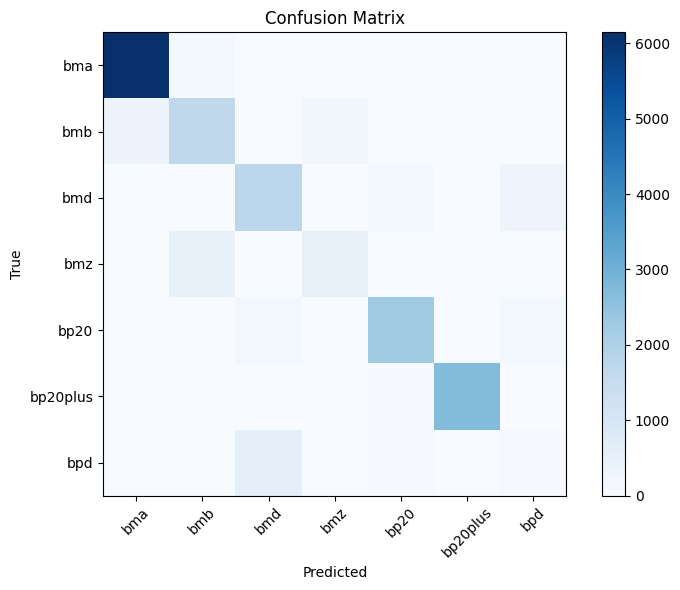

In [2]:
 # Train XGBoost
     # Train XGBoost
from sklearn.metrics import fbeta_score, confusion_matrix, classification_report
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

    # Predict
y_pred = clf.predict(X_test)

    # Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

    # Macro F2 score
f2 = fbeta_score(y_test, y_pred, beta=2, average='macro')
print(f"Macro F2 score: {f2:.4f}\n")

    # Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(len(labels))
plt.xticks(ticks, labels, rotation=45)
plt.yticks(ticks, labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()



e:\ensta\sem4\machine learning\tp ml\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:01:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
              precision    recall  f1-score   support

         bma       0.95      0.98      0.96      6268
         bmb       0.75      0.73      0.74      2277
         bmd       0.71      0.80      0.75      2168
         bmz       0.68      0.51      0.58       918
        bp20       0.90      0.88      0.89      2550
    bp20plus       1.00      0.98      0.99      2757
         bpd       0.11      0.09      0.10       688

    accuracy                           0.85     17626
   macro avg       0.73      0.71      0.72     17626
weighted avg       0.85      0.85      0.85     17626

Macro F2 score: 0.7125



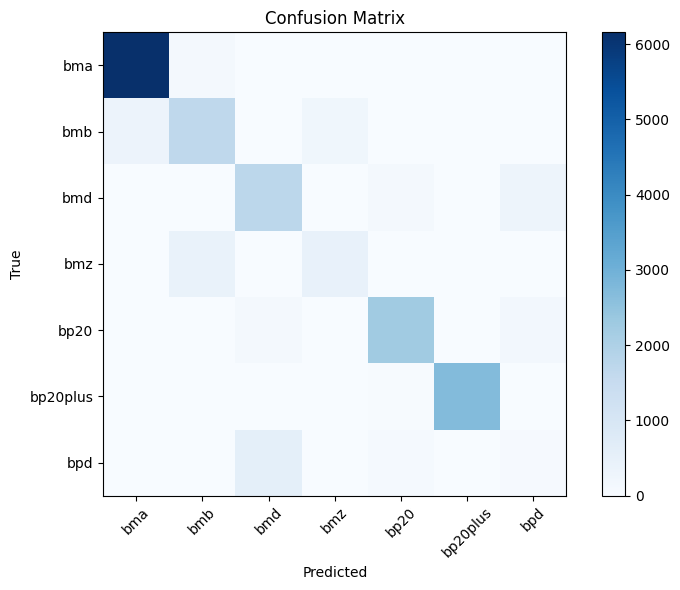

In [5]:
 # Train XGBoost
     # Train XGBoost
from sklearn.metrics import fbeta_score, confusion_matrix, classification_report
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

    # Predict
y_pred = clf.predict(X_test)

    # Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

    # Macro F2 score
f2 = fbeta_score(y_test, y_pred, beta=2, average='macro')
print(f"Macro F2 score: {f2:.4f}\n")

    # Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(len(labels))
plt.xticks(ticks, labels, rotation=45)
plt.yticks(ticks, labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


In [6]:
print(X_train.shape, y_train.shape, labels)
print(X_test.shape, y_test.shape)

(58570, 92) (58570,) ['bma', 'bmb', 'bmd', 'bmz', 'bp20', 'bp20plus', 'bpd']
(17626, 92) (17626,)
